In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "5"

In [2]:
from rich import print
import scanpy as sc
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
import torch
torch.set_float32_matmul_precision('high')

/public/home/xyy/miniforge3/envs/scverse/lib/python3.10/site-packages/torch/cuda/__init__.py:61: FutureWarning: The pynvml package is deprecated. Please install nvidia-ml-py instead. If you did not install pynvml directly, please report this to the maintainers of the package that installed pynvml for you.
  import pynvml  # type: ignore[import]


In [3]:
import tempfile
import scvi
from scvi.model import SCVI

In [4]:
sns.set_theme()
%config InlineBackend.print_figure_kwargs={"facecolor": "w"}
%config InlineBackend.figure_format="retina"

In [5]:
sc.settings.verbosity = 3  
sc.settings.figdir = "/public/home/xyy/LT_tmp/scTE/sEOAD/plots/"
sc.settings.set_figure_params(dpi=120, facecolor="white", dpi_save=900, format="pdf")

In [6]:
print(os.getcwd())
os.chdir("/public/home/xyy/LT_tmp/scTE/sEOAD/")
print(os.getcwd())

/public/home/xyy/LT_tmp/scTE/code/sEOAD

/public/home/xyy/LT_tmp/scTE/sEOAD

In [7]:
scvi.settings.seed = 0
print("Last run with scvi-tools version:", scvi.__version__)
save_dir = tempfile.TemporaryDirectory()
scvi.settings.logging_dir = save_dir.name

Seed set to 0


Last run with scvi-tools version: 1.3.3

In [8]:
adata=sc.read_h5ad("/public/home/xyy/LT_tmp/scTE/sEOAD/sEOAD_popV_q.h5ad")

In [9]:
adata

AnnData object with n_obs × n_vars = 97903 × 10000
    obs: 'bc', 'Sex', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'SampleID', 'r_q', 'cell_type_1', 'Diagnosis', 'batch_key', '_batch_annotation', 'n_counts', '_dataset', '_reference_labels_annotation', '_labels_annotation', '_ref_subsample', '_labelled_train_indices', '_predict_cells', 'over_clustering', 'popv_celltypist_prediction', 'popv_celltypist_prediction_probabilities', 'popv_knn_bbknn_prediction', 'popv_knn_bbknn_prediction_probabilities', 'popv_knn_harmony_prediction', 'popv_knn_harmony_prediction_probabilities', '_scvi_batch', '_scvi_labels', 'popv_knn_on_scvi_prediction', 'popv_knn_on_scvi_prediction_probabilities', 'popv_scanvi_prediction', 'popv_scanvi_prediction_probabilities', 'popv_svm_prediction', 'popv_svm_prediction_probabilities', 'popv_xgboost_prediction', 'popv_xgboost_prediction_probabilities', 'popv_majority_v

In [10]:
adata.obs.sample(3)

bc   Sex  n_genes_by_counts  \
CTGCTCCCACATTAAC-13  CTGCTCCCACATTAAC  male               2705   
GTTGCTGAGCTTCCCG-6   GTTGCTGAGCTTCCCG  male                961   
TTAAGGTGTGGATTAT-19  TTAAGGTGTGGATTAT  male               5420   

                     log1p_n_genes_by_counts  total_counts  \
CTGCTCCCACATTAAC-13                 7.903227        7668.0   
GTTGCTGAGCTTCCCG-6                  6.869014        1729.0   
TTAAGGTGTGGATTAT-19                 8.598036       13209.0   

                     log1p_total_counts  total_counts_mt  \
CTGCTCCCACATTAAC-13            8.944942             56.0   
GTTGCTGAGCTTCCCG-6             7.455877              4.0   
TTAAGGTGTGGATTAT-19            9.488729            258.0   

                     log1p_total_counts_mt  pct_counts_mt SampleID  ...  \
CTGCTCCCACATTAAC-13               4.043051       0.730308    NIH16  ...   
GTTGCTGAGCTTCCCG-6                1.609438       0.231348    NIH06  ...   
TTAAGGTGTGGATTAT-19               5.556828       1.953214     UT04  ...   

                    popv_scanvi_prediction_probabilities popv_svm_prediction  \
CTGCTCCCACATTAAC-13                                  1.0                 Oli   
GTTGCTGAGCTTCCCG-6                                   1.0                 Oli   
TTAAGGTGTGGATTAT-19                                  1.0                 Exc   

                    popv_svm_prediction_probabilities popv_xgboost_prediction  \
CTGCTCCCACATTAAC-13                          0.999978                     Oli   
GTTGCTGAGCTTCCCG-6                           0.999888                     Oli   
TTAAGGTGTGGATTAT-19                          0.996320                     Exc   

                    popv_xgboost_prediction_probabilities  \
CTGCTCCCACATTAAC-13                              0.999999   
GTTGCTGAGCTTCCCG-6                               0.999999   
TTAAGGTGTGGATTAT-19                              0.999997   

                     popv_majority_vote_prediction popv_majority_vote_score  \
CTGCTCCCACATTAAC-13                            Oli                        7   
GTTGCTGAGCTTCCCG-6                             Oli                        7   
TTAAGGTGTGGATTAT-19                            Exc                        7   

                    popv_prediction popv_prediction_score  popv_parent  
CTGCTCCCACATTAAC-13             Oli                     7          Oli  
GTTGCTGAGCTTCCCG-6              Oli                     7          Oli  
TTAAGGTGTGGATTAT-19             Exc                     7          Exc  

[3 rows x 44 columns]

In [11]:
adata.var.sample(3)

feature_types  genome     mt      mean       std
ENSG                                                               
ENSG00000160191  Gene Expression  GRCh38  False  0.181295  0.622897
ENSG00000124257  Gene Expression  GRCh38  False  0.021682  0.206601
ENSG00000189430  Gene Expression  GRCh38  False  0.003614  0.093088

In [12]:
adata.layers['counts']=adata.layers['scvi_counts'].copy()
adata.layers['raw_counts']=adata.layers['scvi_counts'].copy()

In [13]:
adata.obs['popv_prediction_score'].value_counts()

popv_prediction_score
7    93200
6     4703
Name: count, dtype: int64

In [14]:
adata.obs['Sex'].value_counts()

Sex
male      52354
female    45549
Name: count, dtype: int64

In [15]:
adata.obs['popv_prediction'].value_counts()

popv_prediction
Oli           37885
Exc           23185
Inh           11524
Ast           10605
Mic_Immune     6490
OPC            5776
Vasc           2438
Name: count, dtype: int64

In [16]:
adata.obs['Diagnosis'].value_counts()

Diagnosis
AD         54721
Control    43182
Name: count, dtype: int64

In [17]:
adata.obs['batch_key'].value_counts()

batch_key
NIH12     7362
NIH10     7130
NIH15     6939
NIH11     6361
NIH14     6288
NIH16     5881
NIH06     5644
NIH04     5552
UT04      4696
NIH03     4665
UT09      4574
NIH17     4512
NIH18     4298
NIH02     4277
NIH13     3727
NIH29     3237
NIH01     3124
NIH05     2908
NIH28     2865
UT2105    2223
NIH30     1640
Name: count, dtype: int64

In [18]:
adata.obs[['Sex','popv_prediction']].value_counts()

Sex     popv_prediction
female  Oli                21865
male    Oli                16020
        Exc                14337
female  Exc                 8848
male    Inh                 6886
        Ast                 6550
female  Inh                 4638
        Ast                 4055
male    Mic_Immune          3996
        OPC                 3336
female  Mic_Immune          2494
        OPC                 2440
male    Vasc                1229
female  Vasc                1209
Name: count, dtype: int64

In [19]:
scvi.model.SCVI.setup_anndata(
    adata,
    layer='raw_counts',
    labels_key='popv_prediction',
    batch_key="batch_key",
    categorical_covariate_keys=['Sex',],
    continuous_covariate_keys=["pct_counts_mt"],    
)

In [20]:
scvi_model = scvi.model.SCVI(adata,n_layers=3,n_hidden=256,n_latent=32,gene_likelihood="nb")

In [21]:
import time

start2 = time.time()

scvi_model.train(
    max_epochs=1000,
    check_val_every_n_epoch=5,
    early_stopping=True,
    early_stopping_patience=50,
    early_stopping_monitor='elbo_validation',
    accelerator="gpu",
)

print("done")
end2 = time.time()
print(f"Elapsed time: {end2 - start2:.2f} seconds")

/public/home/xyy/miniforge3/envs/scverse/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /public/home/xyy/miniforge3/envs/scverse/lib/python3 ...
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
/public/home/xyy/miniforge3/envs/scverse/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /public/home/xyy/miniforge3/envs/scverse/lib/python3 ...
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [5]
/public/home/xyy/miniforge3/envs/scverse/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:433: The 'train_dataloader' does not 

Training:   0%|          | 0/1000 [00:00<?, ?it/s]

Monitored metric elbo_validation did not improve in the last 50 records. Best score: 2224.854. Signaling Trainer to stop.


done

Elapsed time: 7502.91 seconds

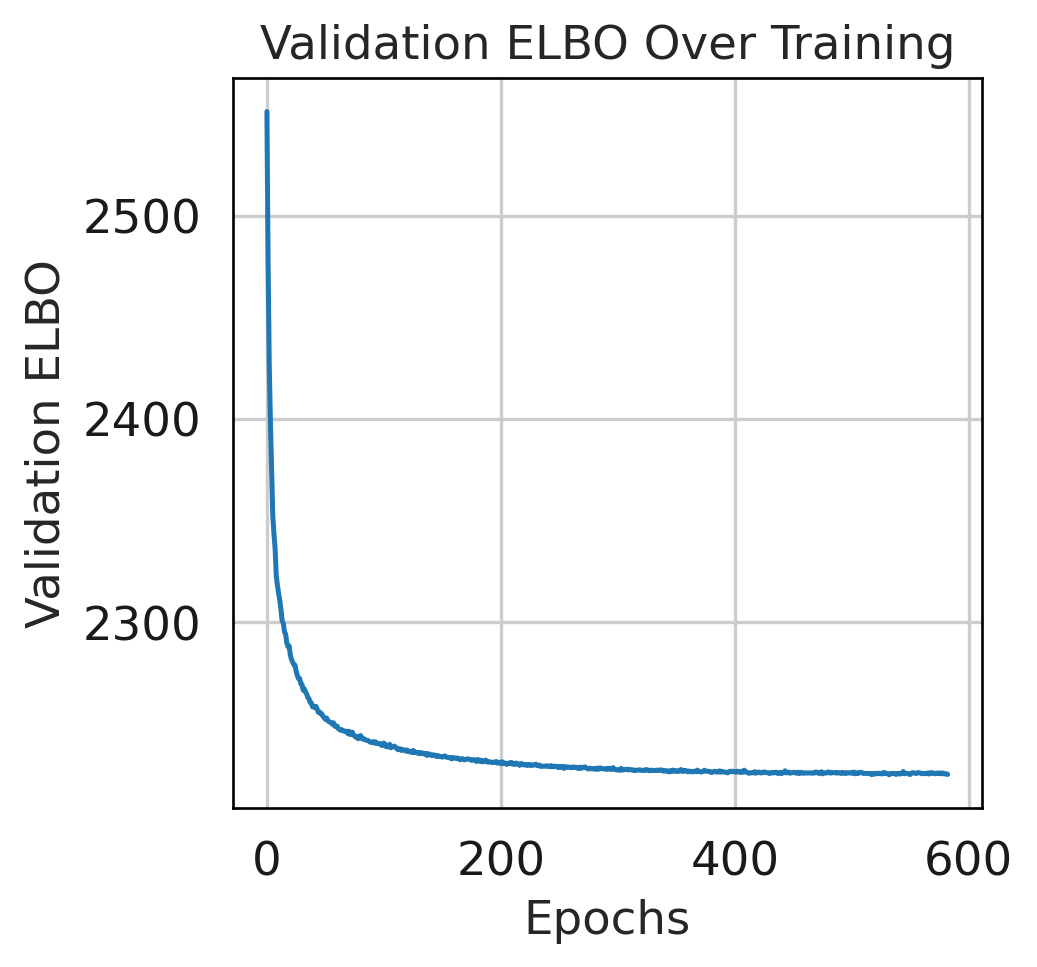

In [22]:
plt.plot(scvi_model.history["elbo_validation"])
plt.xlabel("Epochs")
plt.ylabel("Validation ELBO")
plt.title("Validation ELBO Over Training")
plt.show()

In [23]:
scvi_model

SCVI model with the following parameters: 
n_hidden: 256, n_latent: 32, n_layers: 3, dropout_rate: 0.1, dispersion: gene, gene_likelihood: nb, 
latent_distribution: normal.
Training status: Trained
Model's adata is minified?: False

In [24]:
assert scvi_model.is_trained

In [25]:
SCVI_LATENT_KEY = "X_scVI_sEOAD_gene"
latent = scvi_model.get_latent_representation()
adata.obsm[SCVI_LATENT_KEY] = latent

In [26]:
latent.shape

(97903, 32)

In [27]:
sc.tl.pca(adata)
sc.pp.neighbors(adata, n_pcs=50,)
sc.tl.umap(adata,)

computing PCA
    with n_comps=50
    finished (0:00:30)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:47)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm)
    'umap', UMAP parameters (adata.uns) (0:01:39)


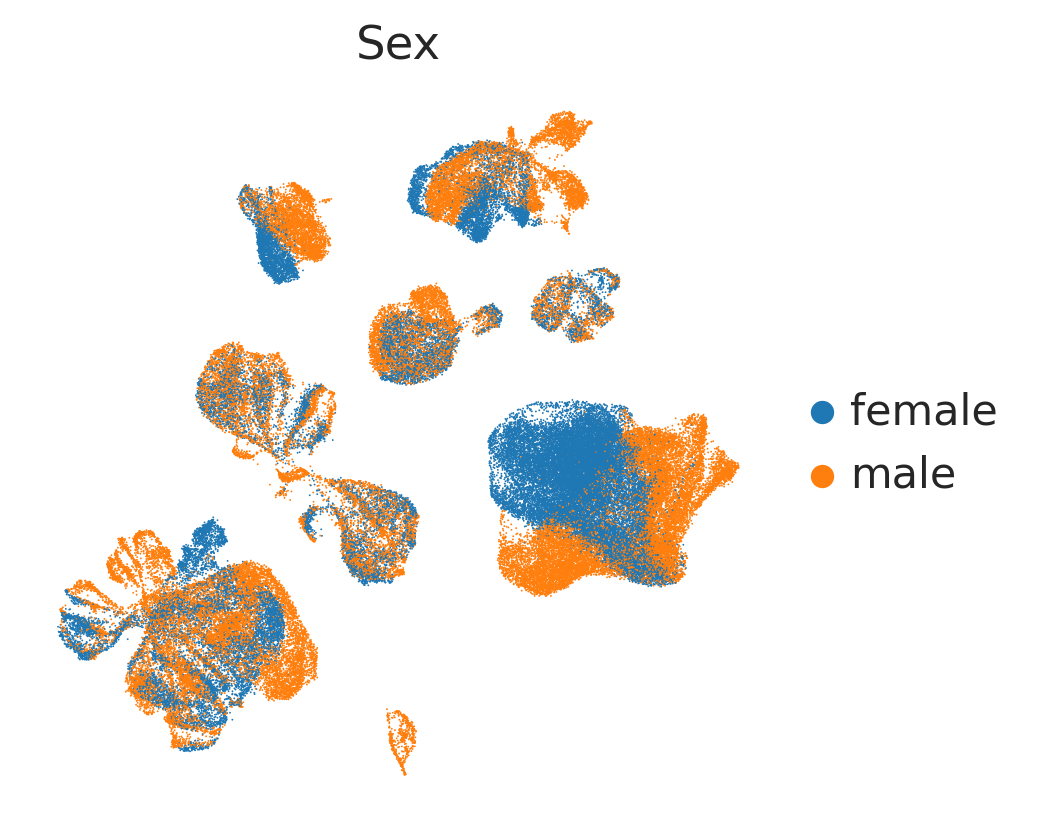

In [28]:
sc.pl.umap(
    adata,
    color=["Sex"],
    frameon=False,
    save="sEOAD_gene_pca_Sex1.pdf",
)

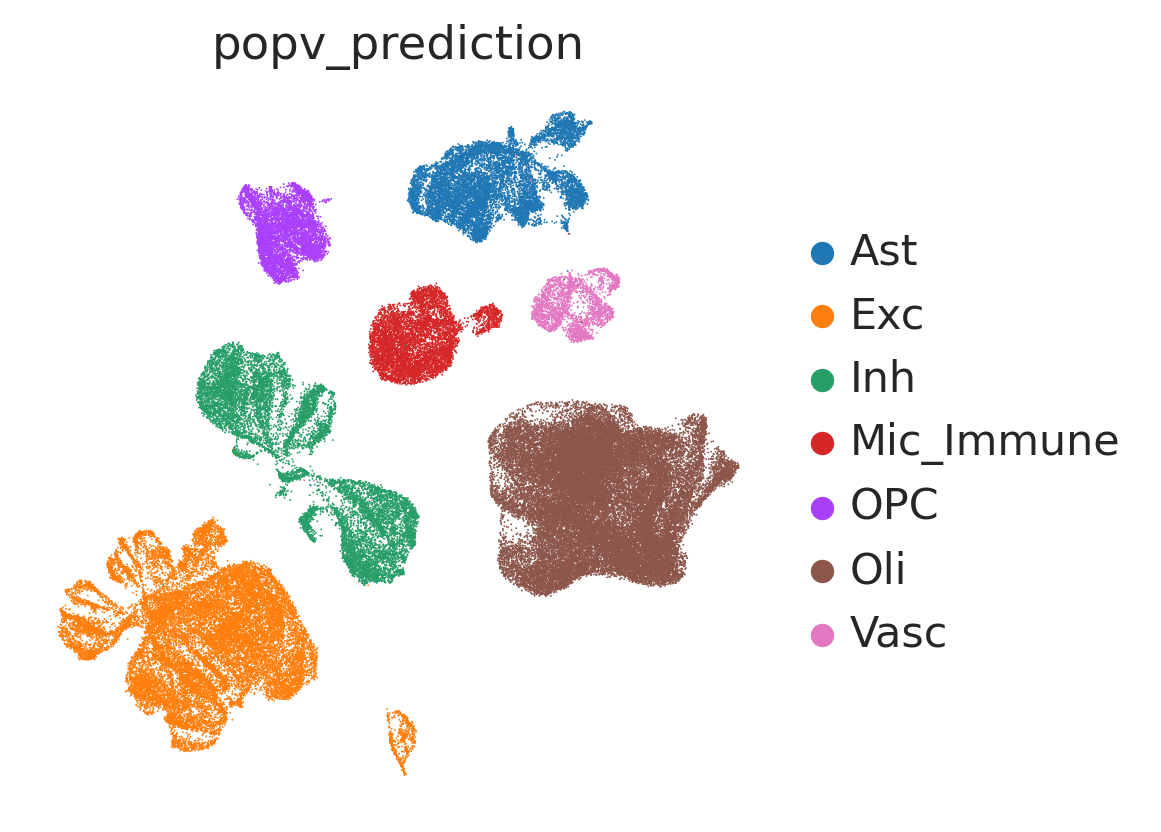

In [29]:
sc.pl.umap(
    adata,
    color=["popv_prediction"],
    frameon=False,
    save="sEOAD_gene_pca_popv_prediction1.pdf",
)

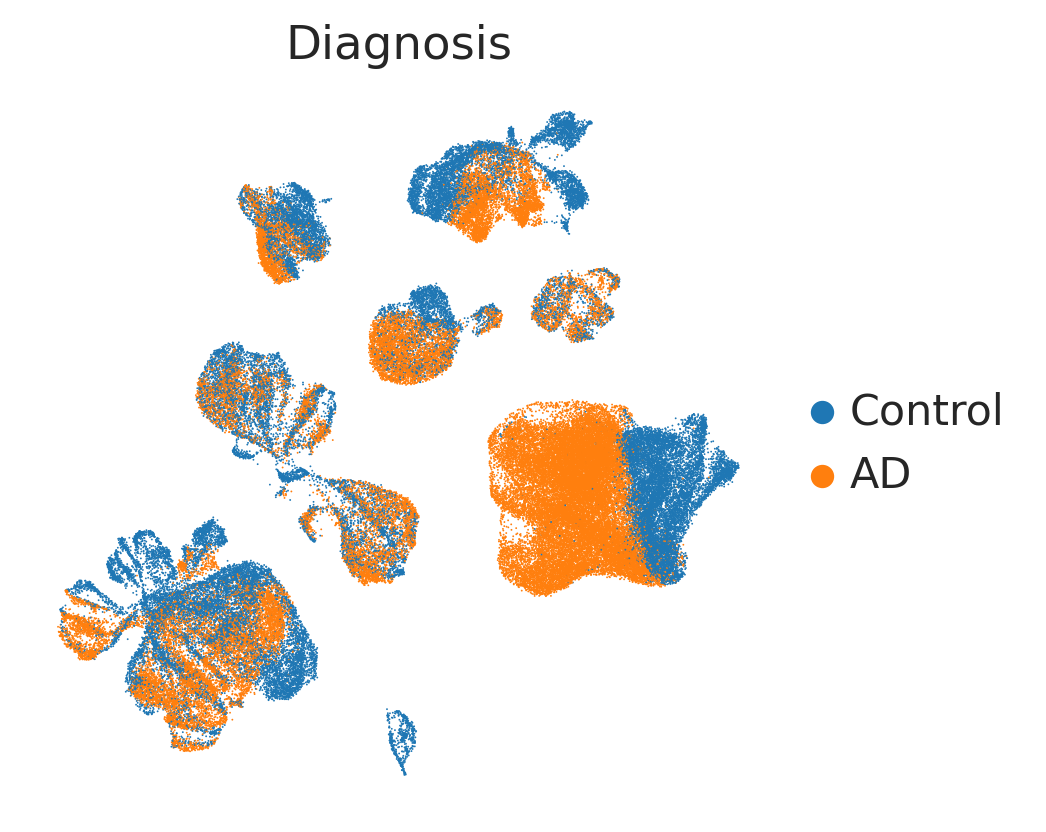

In [30]:
sc.pl.umap(
    adata,
    color=["Diagnosis"],
    frameon=False,
    save="sEOAD_gene_pca_Diagnosis1.pdf",
)

In [31]:
sc.pp.neighbors(adata, use_rep=SCVI_LATENT_KEY,)
sc.tl.leiden(adata,)
sc.tl.umap(adata,)

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:13)
running Leiden clustering


/tmp/ipykernel_1312613/315553268.py:2: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata,)


    finished: found 34 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:02:06)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm)
    'umap', UMAP parameters (adata.uns) (0:01:10)


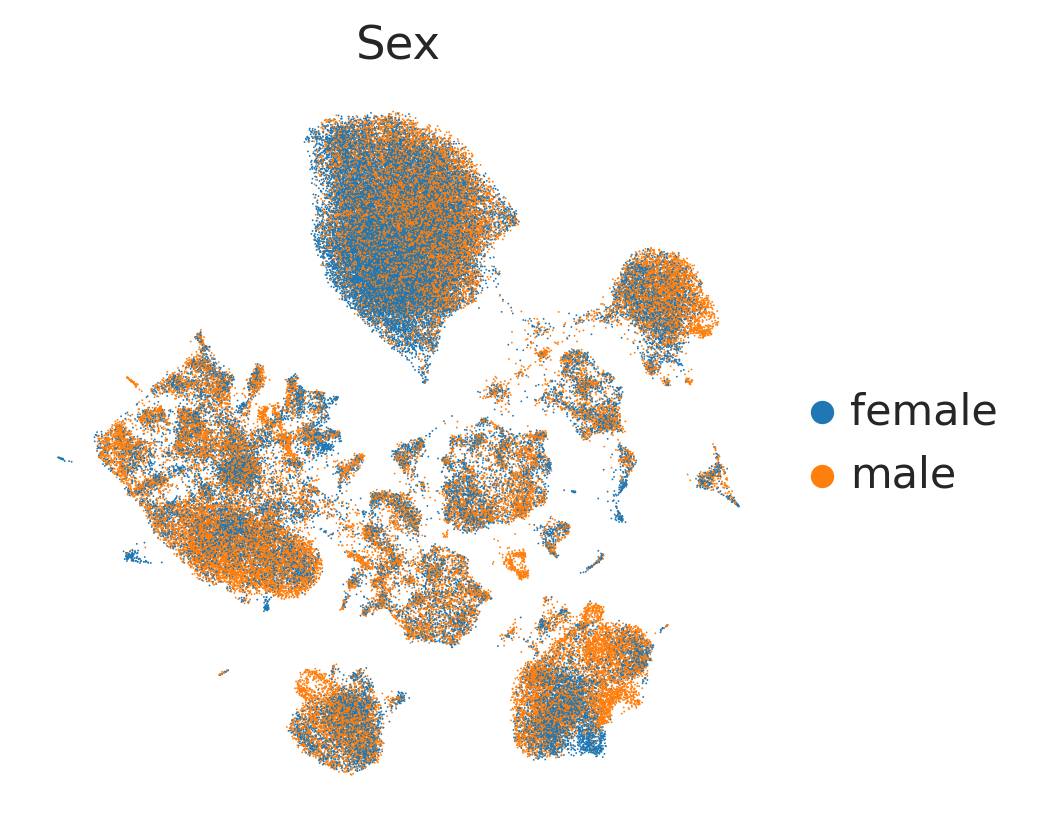

In [32]:
sc.pl.umap(
    adata,
    color=["Sex"],
    frameon=False,
    save="sEOAD_gene_scvi_Sex1.pdf",
)

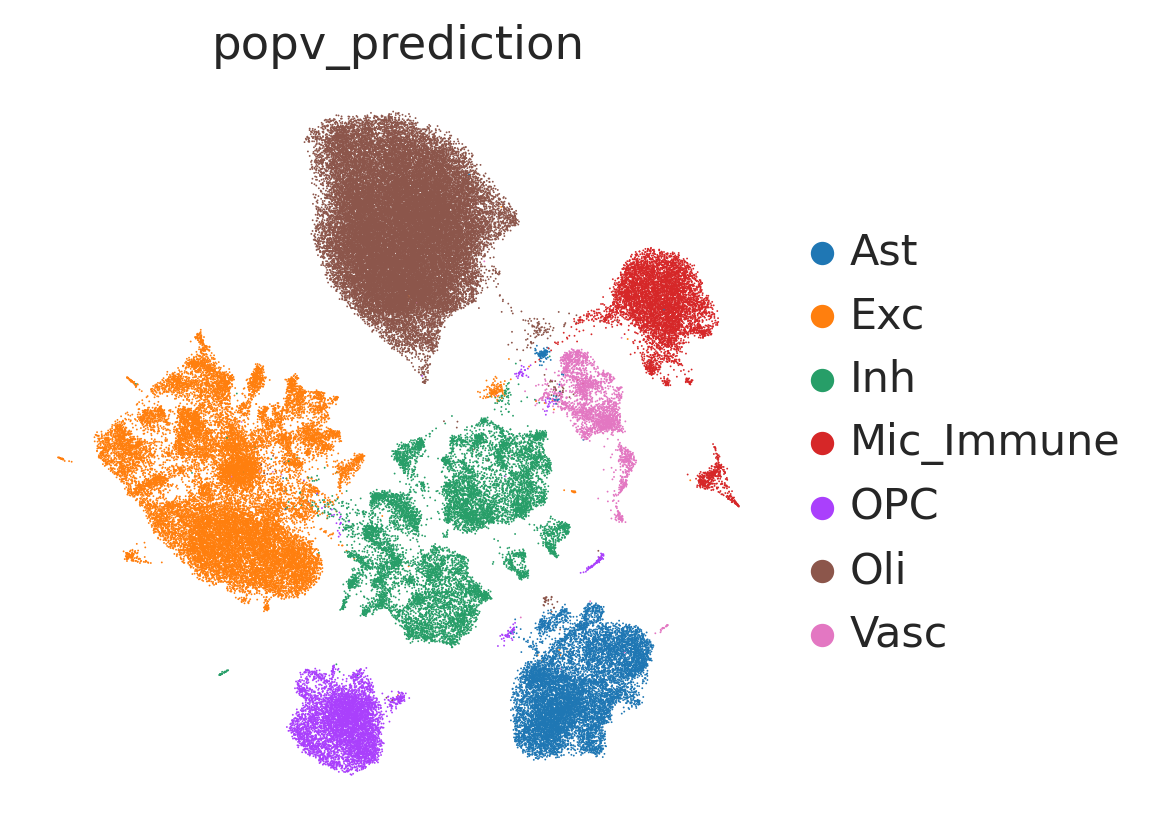

In [33]:
sc.pl.umap(
    adata,
    color=["popv_prediction"],
    frameon=False,
    save="sEOAD_gene_scvi_popv_prediction1.pdf",
)

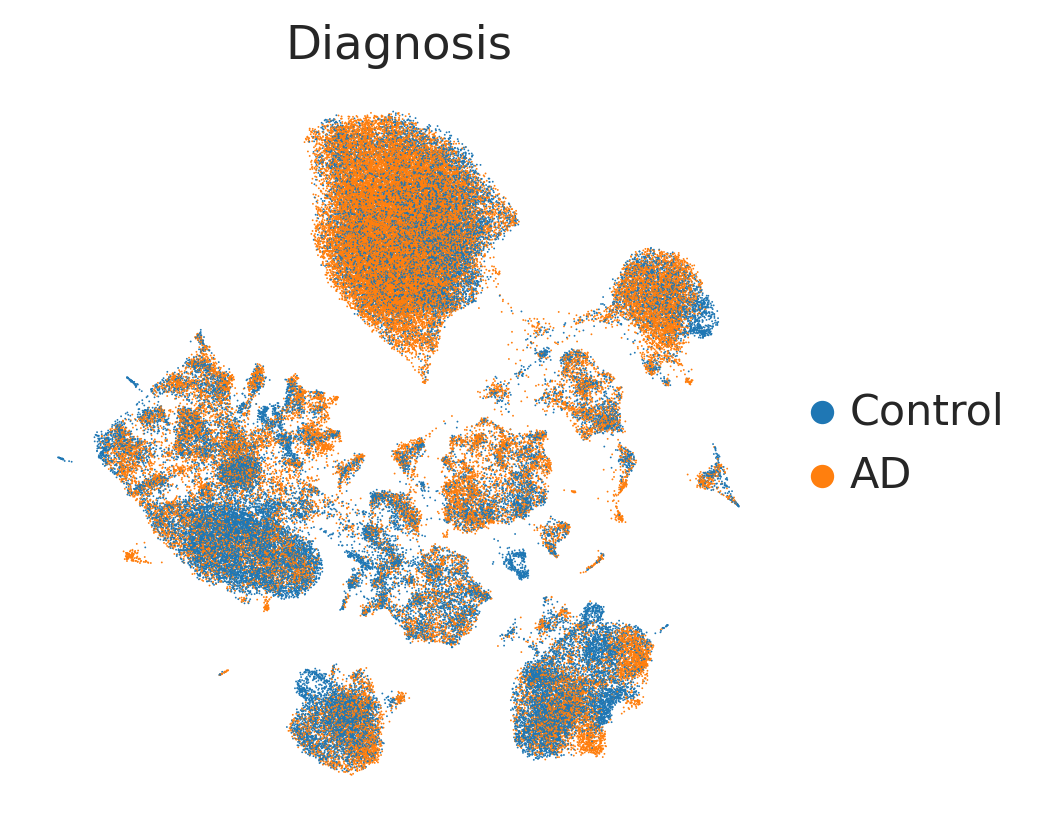

In [34]:
sc.pl.umap(
    adata,
    color=["Diagnosis"],
    frameon=False,
    save="sEOAD_gene_scvi_Diagnosis1.pdf",
)

In [35]:
SCVI_CLUSTERS_KEY = "leiden_scVI"
sc.tl.leiden(adata, key_added=SCVI_CLUSTERS_KEY, resolution=0.8)

running Leiden clustering
    finished: found 34 clusters and added
    'leiden_scVI', the cluster labels (adata.obs, categorical) (0:04:47)


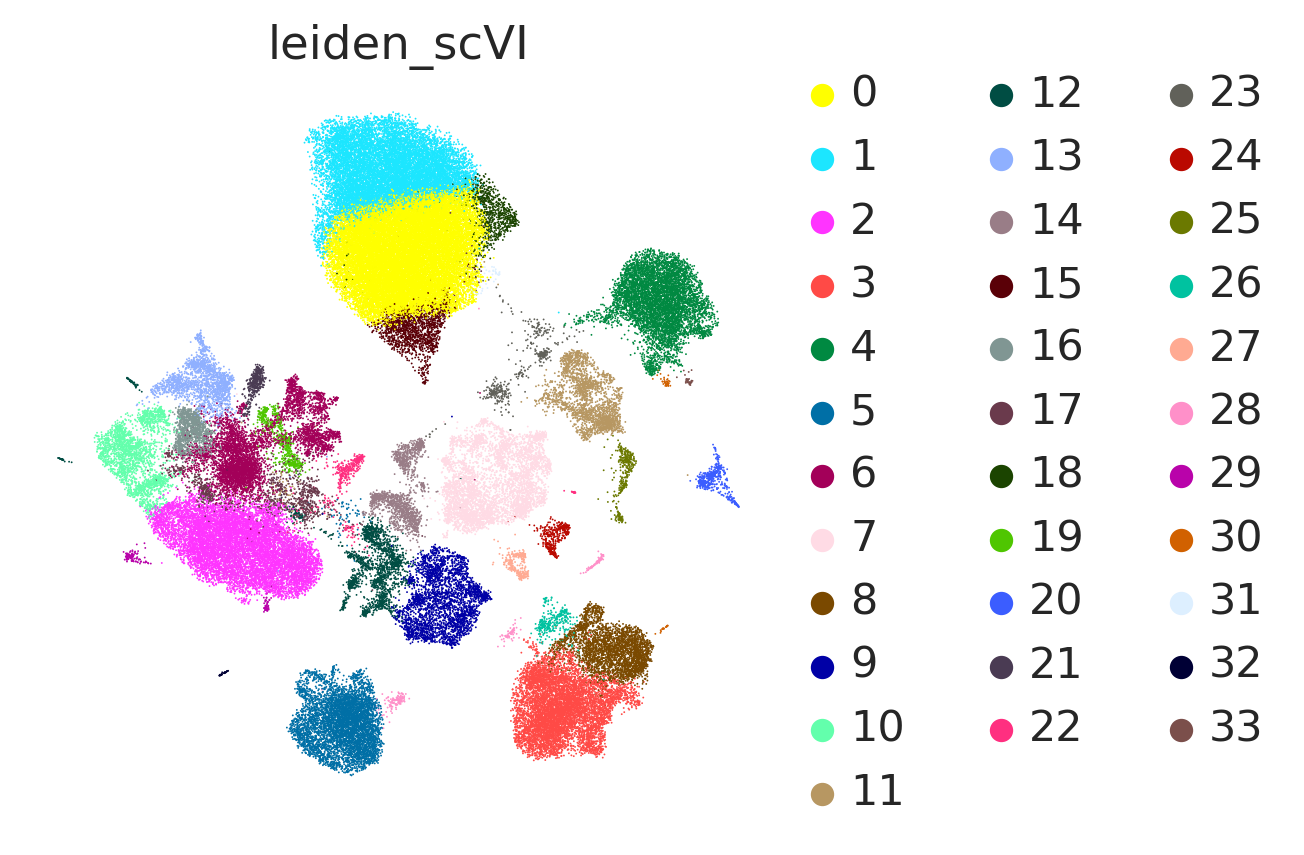

In [36]:
sc.pl.umap(
    adata,
    color=[SCVI_CLUSTERS_KEY],
    frameon=False,
    save="sEOAD_gene_scvi_leiden0.8_scVI1.pdf",
)

In [37]:
adata.write_h5ad("./sEOAD_gene_scvi_1.h5ad",compression="gzip")

In [38]:
scanvi_model = scvi.model.SCANVI.from_scvi_model(
    scvi_model,
    adata=adata,
    labels_key="popv_prediction",
    unlabeled_category="Unknown",
    linear_classifier=True,
)

In [39]:
scanvi_model.train(
    max_epochs=1000, 
    n_samples_per_label=1000,
    check_val_every_n_epoch=5,
    early_stopping=True,
    early_stopping_patience=50,
    early_stopping_monitor='elbo_validation',
    accelerator="gpu",
)

INFO     Training for 1000 epochs.                                                                                 


/public/home/xyy/miniforge3/envs/scverse/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /public/home/xyy/miniforge3/envs/scverse/lib/python3 ...
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
/public/home/xyy/miniforge3/envs/scverse/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /public/home/xyy/miniforge3/envs/scverse/lib/python3 ...
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [5]
/public/home/xyy/miniforge3/envs/scverse/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:433: The 'train_dataloader' does not 

Training:   0%|          | 0/1000 [00:00<?, ?it/s]

Monitored metric elbo_validation did not improve in the last 50 records. Best score: 2224.228. Signaling Trainer to stop.


In [40]:
SCANVI_LATENT_KEY = "X_scANVI_sEOAD_gene"
adata.obsm[SCANVI_LATENT_KEY] = scanvi_model.get_latent_representation(adata)

In [41]:
sc.pp.neighbors(adata, use_rep=SCANVI_LATENT_KEY)
sc.tl.umap(adata,)

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:08)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm)
    'umap', UMAP parameters (adata.uns) (0:01:05)


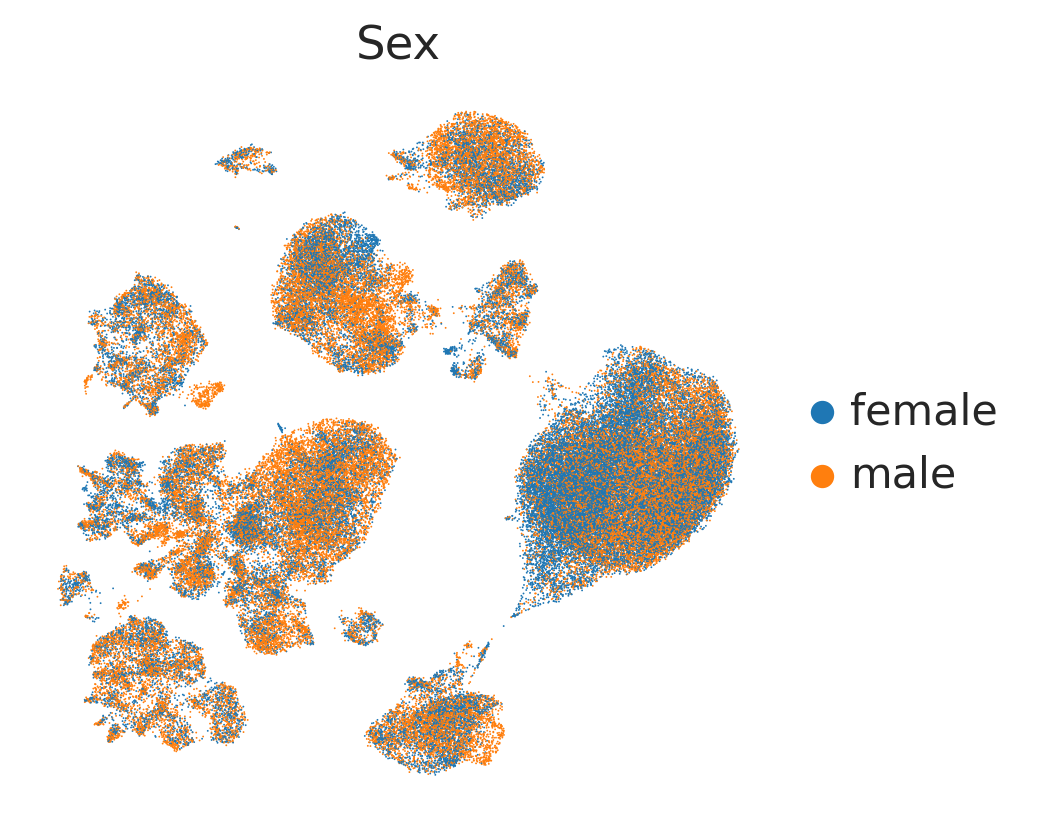

In [42]:
sc.pl.umap(
    adata,
    color=["Sex"],
    frameon=False,
    save="sEOAD_gene_scanvi_Sex1.pdf",
)

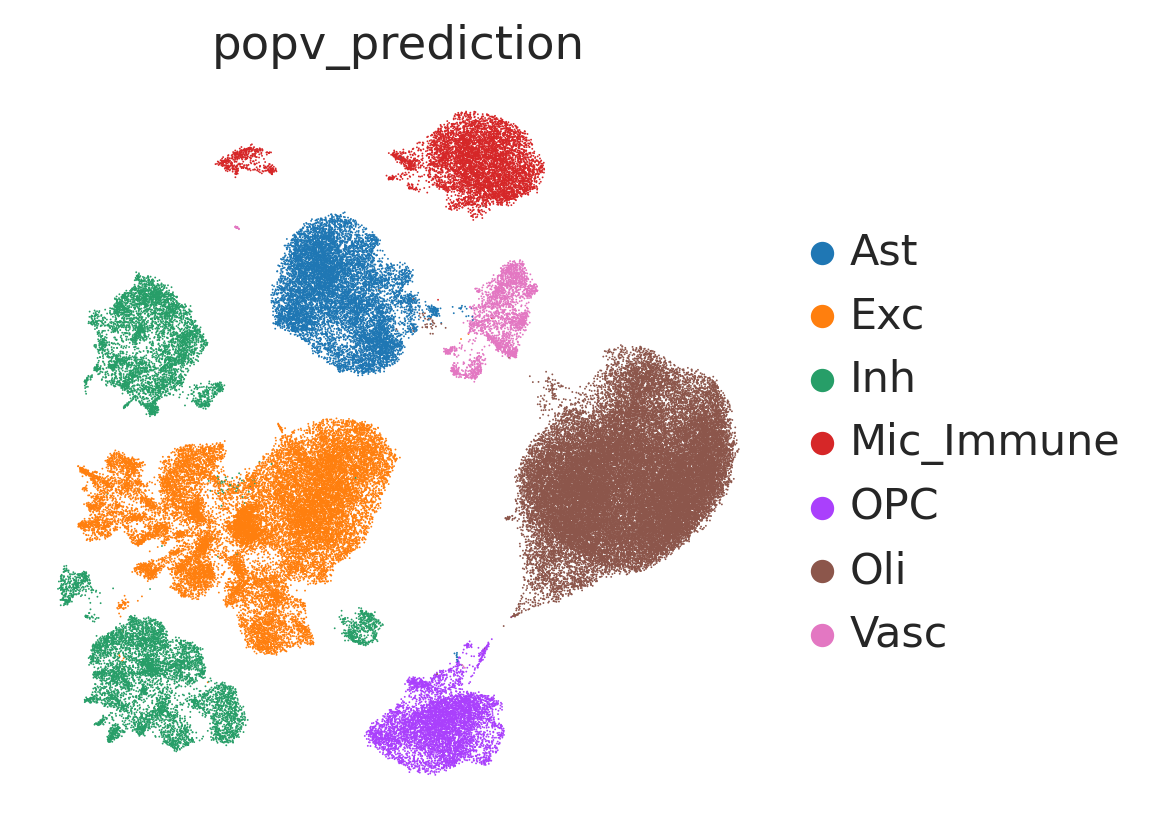

In [43]:
sc.pl.umap(
    adata,
    color=["popv_prediction"],
    frameon=False,
    save="sEOAD_gene_scanvi_popv_prediction1.pdf",
)

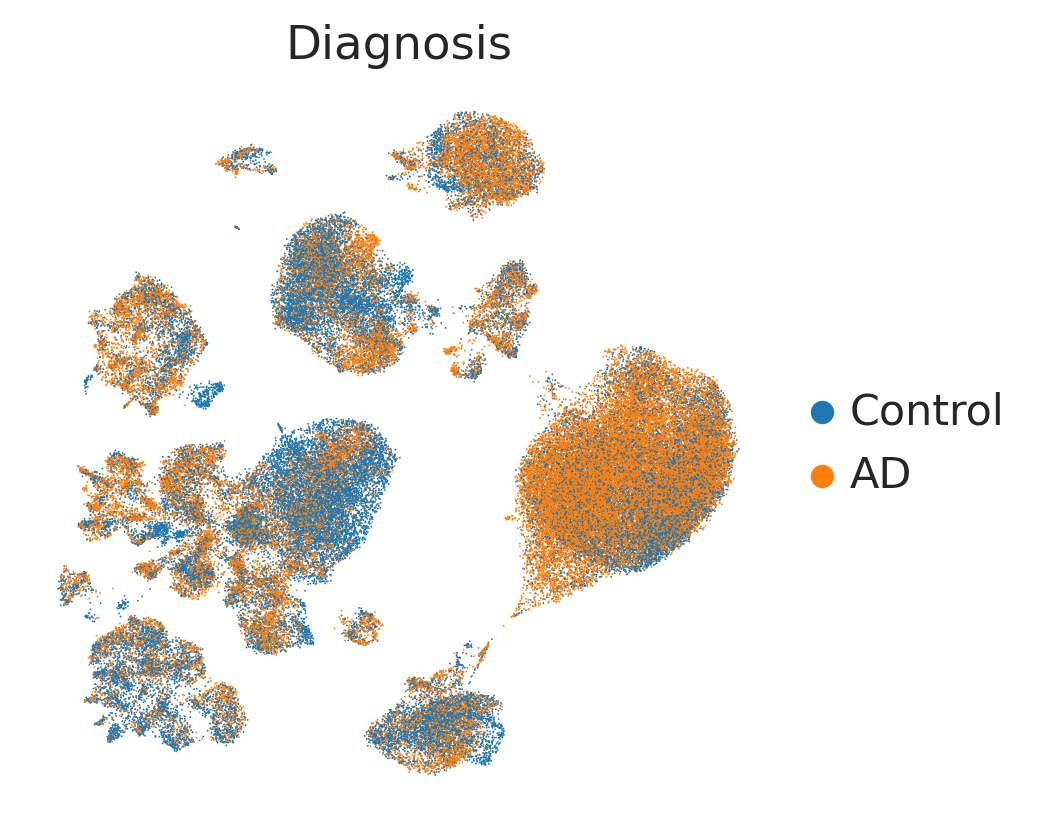

In [44]:
sc.pl.umap(
    adata,
    color=["Diagnosis"],
    frameon=False,
    save="sEOAD_gene_scanvi_Diagnosis1.pdf",
)

In [45]:
scanvi_CLUSTERS_KEY = "leiden_scanvi"
sc.tl.leiden(adata, key_added=scanvi_CLUSTERS_KEY, resolution=0.8)

running Leiden clustering
    finished: found 28 clusters and added
    'leiden_scanvi', the cluster labels (adata.obs, categorical) (0:03:25)


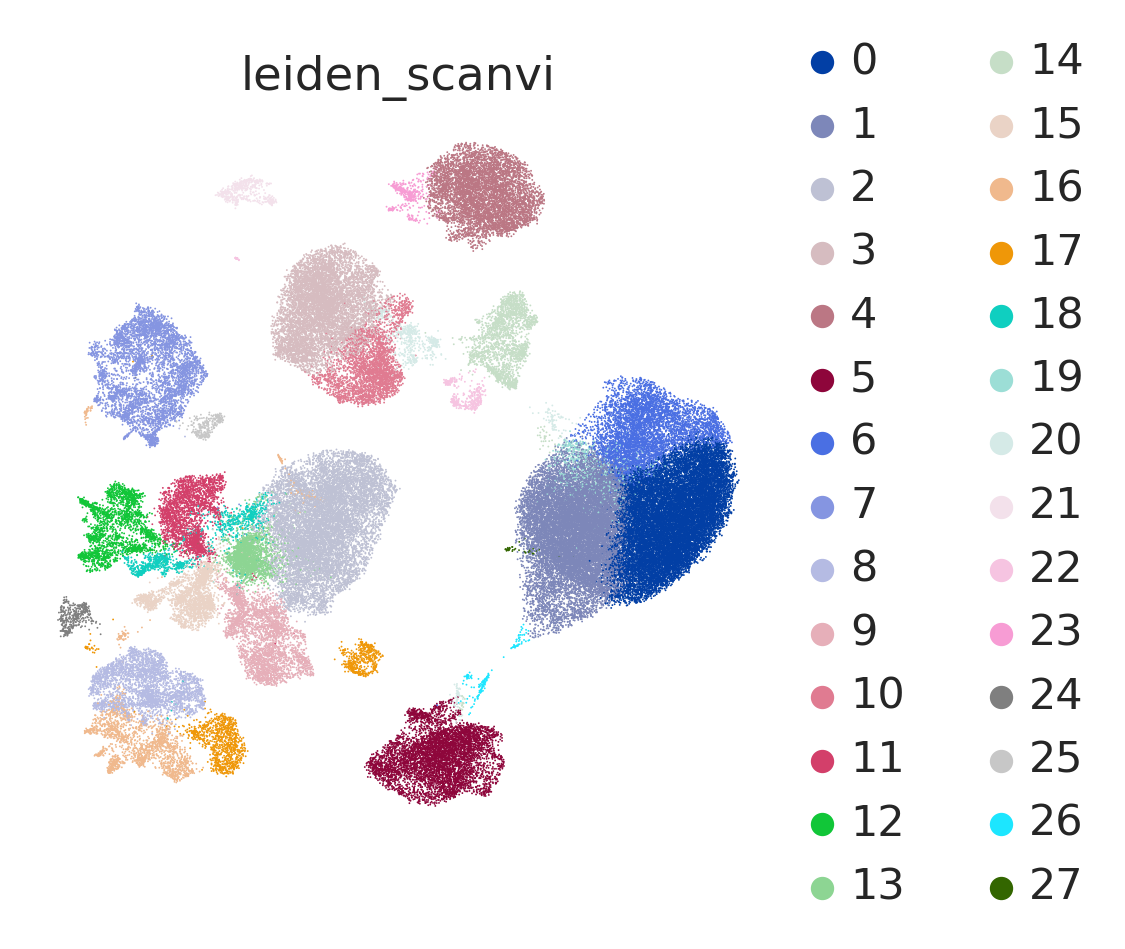

In [46]:
sc.pl.umap(
    adata,
    color=[scanvi_CLUSTERS_KEY],
    frameon=False,
    save="sEOAD_gene_scanvi_leiden0.8_scanvi1.pdf",
)

In [47]:
adata.write_h5ad("./sEOAD_gene_scanvi_1.h5ad",compression="gzip")